In [5]:
import numpy
import numpy as np
from scipy.special import expit
import random
import matplotlib.pyplot as plt

# GNN AUFGABE 2
# Ali Babaoglu 1827133

In [8]:
# This class represents a neural network. 
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes,outputnodes, learningrate, bias=1):
        
        # set number of nodes in each input, hidden, output layer
        self.inodes= inputnodes
        self.hnodes = hiddennodes
        self.onodes= outputnodes
        self.bias= bias
        
        #learning rate
        self.lr = learningrate
        
        #weights
        self.wih = (numpy.random.rand(self.hnodes, self.inodes + self.bias))
        self.who = (numpy.random.rand(self.onodes, self.hnodes + self.bias))
   
        # sigmoid function
        self.activation_function = lambda x: expit(x)
        pass
    
    # train the neural network
    def train(self,inputs_list,targets_list):
        inputs_list.append(self.bias)
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        hidden_outputs = numpy.vstack([hidden_outputs,[self.bias]])
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))[:-1]
        pass
    
    # query the neural network
    def query(self,inputs_list):
        
        inputs_list.append(self.bias)
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        hidden_outputs = numpy.vstack([hidden_outputs,[self.bias]])
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)        
        return final_outputs

# checks whether point lies in the unit circle
# Params: x-y coordinate
# Returns: 0.8 if point in unit cicle else 0.0
def point_in_unit_circle(x,y):
    if ((x ** 2) + (y ** 2)) <= 1:
        return 0.8
    return 0
# Generates training data 
def generate_training_data(n):

    data = [numpy.array([x,y]) for x in np.random.uniform(low=-2, high=2, size=int(np.sqrt(n)))
                                 for y in np.random.uniform(low=-2, high=2, size=int(np.sqrt(n)))]
    return data

        
    

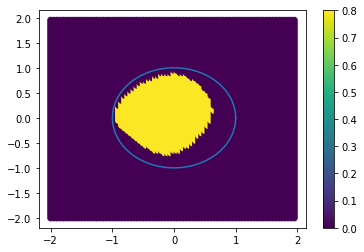

In [10]:
input_nodes= 2
hidden_nodes= 4
output_nodes = 1

learning_rate= 0.3
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

training_data = generate_training_data(100000)
random.shuffle(training_data)


training_targets = [point_in_unit_circle(*r)
                    for r 
                    in training_data]

for input,target in zip(training_data, training_targets):
    n.train(list(input),target)


data = [[x,y] for x in np.arange(-2,2,0.05)
                          for y in np.arange(-2,2,0.05)]
plt.figure()
plt.scatter([row[0] for row in data], 
            [row[1] for row in data], 
            c=[ 0.8 if n.query(row) > 0.3  else 0 for row in data])

x = 1 * np.cos(  np.linspace( 0 , 2 * np.pi , 150 )  ) 
y = 1 * np.sin(  np.linspace( 0 , 2 * np.pi , 150 )  ) 
plt.plot(x, y)
plt.colorbar()
plt.show()